# K-Sample Hypothesis Tests with Python

## Objectives

- Understand the application of k-sample tests to evaluate differences among multiple groups.
- Determine if group means significantly differ using one-way ANOVA.
- Assess the group effects on a continuous dependent variable through repeated measures ANOVA.
- Utilize non-parametric methods like the Kruskal-Wallis H and Friedman tests to analyze data that does not meet ANOVA assumptions.

## Background

This notebook dives into k-sample hypothesis testing to ascertain if variances between k-random samples from distinct populations are statistically meaningful. We explore various statistical models, such as ANOVA, Kruskal-Wallis H, and Friedman tests. Each model caters to different data conditions and assumptions, aiming to pinpoint significant differences across multiple groups.

## Datasets Used

The data for this analysis are synthetic. They consist of generated normal distributions representing grades or test scores for multiple groups. These synthetic datasets simulate different educational strategies across groups or different testing conditions, providing a practical application for the k-sample testing methods used in this notebook.

## Introduction

In statistical hypothesis testing, a k-sample test is performed on the data of k-random samples. The purpose is to determine whether the population difference is statistically significant.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns; 
sns.set_style("whitegrid")  

from scipy import stats as st
from statsmodels.stats.anova import AnovaRM

## Oneway ANOVA

`Analysis of variance (ANOVA)` is a collection of statistical models and their associated estimation procedures (such as the "variation" among and between groups) used to analyze the differences among group means in a sample. 

ANOVA was developed by the statistician Ronald Fisher.

Assumptions:
- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample are normally distributed.
- Observations in each sample have the same variance.

Hypothesis:
- Ho: the means of the samples are equal.
- Ha: one or more of the means of the samples are unequal.

In [2]:
# Set the random number generator to a fixed sequence.
np.random.seed(50) 
g1_grades = np.random.normal(80, 6, size=50)
g2_grades = np.random.normal(82, 4, size=48)
g3_grades = np.random.normal(83, 5, size=52)

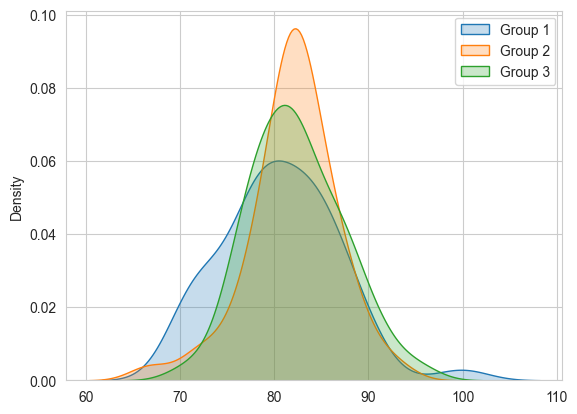

In [3]:
sns.kdeplot(g1_grades, fill = True, label="Group 1")
sns.kdeplot(g2_grades, fill = True, label="Group 2")
sns.kdeplot(g3_grades, fill = True, label="Group 3")
plt.legend();

In [4]:
# Creating a dataframe with g1_grades
dfG1 = pd.DataFrame(columns=['Group','Grades'])
dfG1['Grades'] = g1_grades
dfG1['Group']  = 1
print(dfG1.shape)
dfG1.head()

(50, 2)


,Group,Grades
0,1,70.637887
1,1,79.814134
2,1,76.274429
3,1,71.212517
4,1,88.471677


In [5]:
# Creating a dataframe with g2_grades and g3_grades
dfG2 = pd.DataFrame(columns=['Group','Grades'])
dfG2['Grades'] = g2_grades
dfG2['Group']  = 2

dfG3 = pd.DataFrame(columns=['Group','Grades'])
dfG3['Grades'] = g3_grades
dfG3['Group']  = 3

In [6]:
frames = [dfG1, dfG2, dfG3]
data = pd.concat(frames, ignore_index=True)
print(data.shape)
data.head()

(150, 2)


,Group,Grades
0,1,70.637887
1,1,79.814134
2,1,76.274429
3,1,71.212517
4,1,88.471677


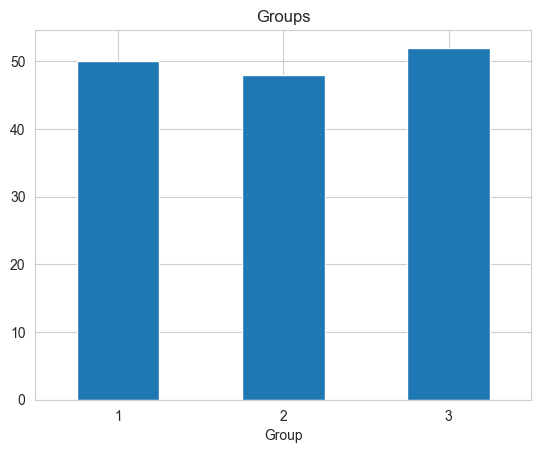

In [7]:
data.Group.value_counts(sort=False).plot(kind='bar', rot=True, title='Groups');

In [8]:
def ANOVA(*arrays, alpha=0.05):
    '''This function takes in a list of arrays and returns the ANOVA table'''
    arrays = [np.array(a) for a in arrays]
    print('--- ANOVA test ---')
    print('    Ho: sample means are similar')
    print('    Ha: there are at least two different means')
    for i, a in enumerate(arrays):
        print('Sample %i    n = %i    Mean = %.2f    Std = %.2f' %(i+1, len(a), a.mean(), a.std()))
    stat, pval = st.f_oneway(*arrays)
    print('f-value = %.3f    p-value = %.4f' %(stat, pval))
    alpha = alpha
    if pval < alpha:    # alpha value is 0.05 or 5%
        print("%.4f <= %.2f We are rejecting the null hypothesis!" %(pval, alpha))
    else:
        print("%.4f > %.2f We have no reason to reject the null hypothesis!" %(pval, alpha))  


In [9]:
ANOVA(g1_grades, g2_grades, g3_grades)

--- ANOVA test ---
    Ho: sample means are similar
    Ha: there are at least two different means
Sample 1    n = 50    Mean = 80.56    Std = 6.01
Sample 2    n = 48    Mean = 81.92    Std = 4.63
Sample 3    n = 52    Mean = 82.27    Std = 4.90
f-value = 1.482    p-value = 0.2305
0.2305 > 0.05 We have no reason to reject the null hypothesis!


In [10]:
# Creating another variable with g4_grades
np.random.seed(50) 
g4_grades = np.random.normal(60, 5, size=44)

In [11]:
ANOVA(g1_grades, g2_grades, g3_grades, g4_grades)

--- ANOVA test ---
    Ho: sample means are similar
    Ha: there are at least two different means
Sample 1    n = 50    Mean = 80.56    Std = 6.01
Sample 2    n = 48    Mean = 81.92    Std = 4.63
Sample 3    n = 52    Mean = 82.27    Std = 4.90
Sample 4    n = 44    Mean = 60.80    Std = 5.03
f-value = 180.097    p-value = 0.0000
0.0000 <= 0.05 We are rejecting the null hypothesis!


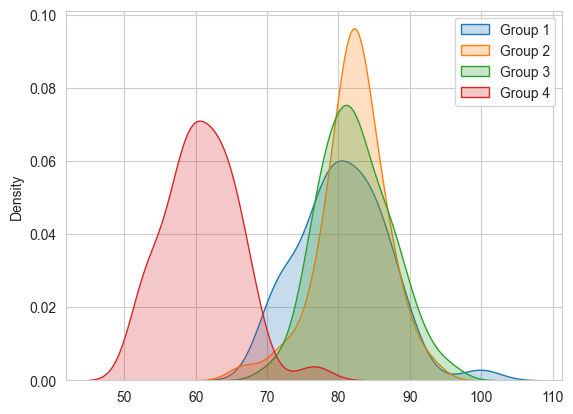

In [12]:
sns.kdeplot(g1_grades, fill = True, label="Group 1")
sns.kdeplot(g2_grades, fill = True, label="Group 2")
sns.kdeplot(g3_grades, fill = True, label="Group 3")
sns.kdeplot(g4_grades, fill = True, label="Group 4")
plt.legend();

### Tuckey's Test

In [13]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [14]:
tukey_test = pairwise_tukeyhsd( endog=data.Grades,  # Data
                                groups=data.Group,  # Groups
                                alpha=0.05)         # Significance level

In [15]:
tukey_test.pvalues

array([0.41122658, 0.2325737 , 0.94031661])

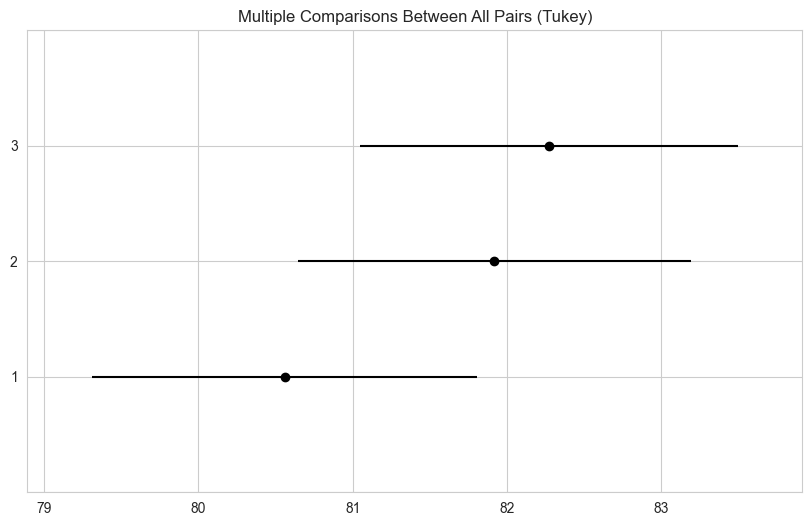

In [16]:
# Plotting groups confidence intervals
tukey_test.plot_simultaneous();

In [17]:
tukey_test.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,1.359,0.4112,-1.1636,3.8816,False
1,3,1.7117,0.2326,-0.7609,4.1843,False
2,3,0.3527,0.9403,-2.146,2.8514,False


There are no significant differences among groups.

In this case, it was not necessary to apply the Tukey Test because ANOVA test was not significant (p-value > 0.05).

Let's see what happen with 4 groups:

In [18]:
dfG4 = pd.DataFrame(columns=['Group','Grades'])
dfG4['Grades'] = g4_grades
dfG4['Group']  = 4
print(dfG4.shape)
dfG4.head(2)

(44, 2)


,Group,Grades
0,4,52.198239
1,4,59.845112


In [19]:
# Concatenating
data2 = pd.concat([data, dfG4], ignore_index=True)
print(data2.shape)

(194, 2)


In [20]:
# Applying Tukey Test to the 4 groups
tukey_test2 = pairwise_tukeyhsd(endog=data2.Grades,  # Data
                                groups=data2.Group,  # Groups
                                alpha=0.05)         # Significance level
print(tukey_test2.pvalues)                                

[0.57328906 0.35226171 0.         0.98680252 0.         0.        ]


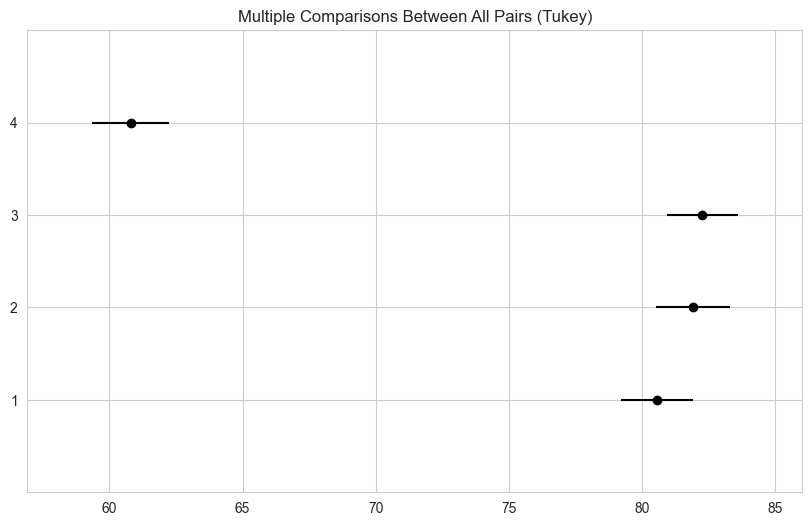

In [21]:
tukey_test2.plot_simultaneous();

There are significant differences between group 4 and the other three (groups 1, 2, and 3).

In [22]:
tukey_test2.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,1.359,0.5733,-1.3811,4.0992,False
1,3,1.7117,0.3523,-0.9741,4.3975,False
1,4,-19.7627,0.0,-22.5656,-16.9597,True
2,3,0.3527,0.9868,-2.3615,3.0669,False
2,4,-21.1217,0.0,-23.9519,-18.2915,True
3,4,-21.4744,0.0,-24.252,-18.6968,True


## Repeated Measures ANOVA

Repeated Measures ANOVA is a statistical technique that assesses the impact of one or more independent variables on a dependent variable, considering measurements taken from the same subjects over multiple time points or conditions. It is advantageous when studying changes within subjects under different experimental conditions.

Assumptions:
- Normality of data
- Independence within and between groups
- Sphericity

Hypothesis:
- Ho: the distributions of all samples are equal.
- Ha: the distributions of one or more samples are not equal.

In [23]:
# Generating data
np.random.seed(50) 
test1 = np.random.normal(60, 5, size = 50)
test2 = np.random.normal(61, 4, size = 50)
test3 = np.random.normal(61, 5, size = 50)

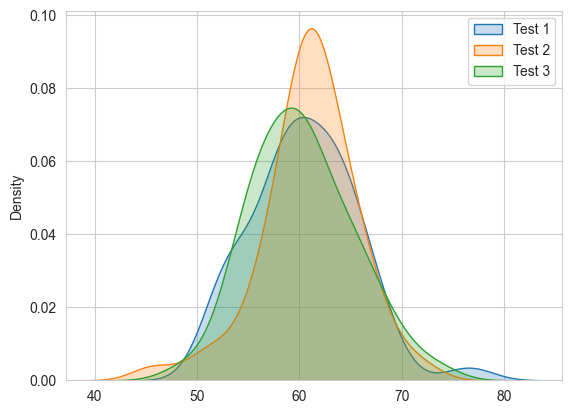

In [24]:
sns.kdeplot(test1, fill = True, label = "Test 1")
sns.kdeplot(test2, fill = True, label = "Test 2")
sns.kdeplot(test3, fill = True, label = "Test 3")
plt.legend();

In [25]:
def ANOVA_RM(*arrays, alpha=0.05):    
    '''This function takes in a list of arrays and returns the Repeated Meassures ANOVA table'''
    arrays = [np.array(a) for a in arrays]
    print('--- Repeated Meassures ANOVA test ---')
    print('    Ho: sample means are similar')
    print('    Ha: there are at least two different means')
    data = pd.DataFrame({'subject': range(len(test1))})
    for i, a in enumerate(arrays):
        print('Sample %i    n = %i    Mean = %.2f    Std = %.2f' %(i+1, len(a), a.mean(), a.std()))
        data['test%i' %(i+1)] = a        
    test_vars = data.columns[1:]     
    # Convert the dataframe to a long format
    data_long = pd.melt(data, id_vars=['subject'], value_vars=test_vars,
                        var_name='test', value_name='score')
    # Fit the repeated measures ANOVA model using AnovaRM
    rm_anova = AnovaRM(data_long, 'score', 'subject', within=['test']).fit()
    # Get the F-statistic and p-value
    f_stat = rm_anova.anova_table['F Value'].iloc[0]
    p_value = rm_anova.anova_table['Pr > F'].iloc[0]
    print('f-value = %.3f    p-value = %.4f' %(f_stat, p_value))
    alpha = alpha
    if p_value < alpha:    # alpha value is 0.05 or 5%
        print("%.4f <= %.2f We are rejecting the null hypothesis!" %(p_value, alpha))
    else:
        print("%.4f > %.2f We have no reason to reject the null hypothesis!" %(p_value, alpha))  

In [26]:
ANOVA_RM(test1, test2, test3)

--- Repeated Meassures ANOVA test ---
    Ho: sample means are similar
    Ha: there are at least two different means
Sample 1    n = 50    Mean = 60.47    Std = 5.01
Sample 2    n = 50    Mean = 60.95    Std = 4.57
Sample 3    n = 50    Mean = 60.21    Std = 4.94
f-value = 0.273    p-value = 0.7616
0.7616 > 0.05 We have no reason to reject the null hypothesis!


In [27]:
# Let's generate more data
np.random.seed(50) 
test4 = np.random.normal(70, 4, size = 50)

In [28]:
ANOVA_RM(test1, test2, test3, test4)

--- Repeated Meassures ANOVA test ---
    Ho: sample means are similar
    Ha: there are at least two different means
Sample 1    n = 50    Mean = 60.47    Std = 5.01
Sample 2    n = 50    Mean = 60.95    Std = 4.57
Sample 3    n = 50    Mean = 60.21    Std = 4.94
Sample 4    n = 50    Mean = 70.37    Std = 4.01
f-value = 60.240    p-value = 0.0000
0.0000 <= 0.05 We are rejecting the null hypothesis!


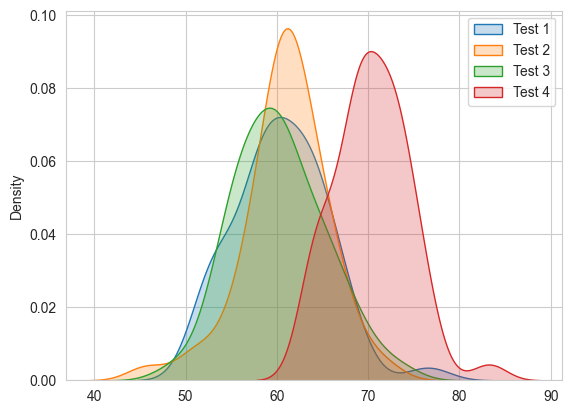

In [29]:
sns.kdeplot(test1, fill = True, label = "Test 1")
sns.kdeplot(test2, fill = True, label = "Test 2")
sns.kdeplot(test3, fill = True, label = "Test 3")
sns.kdeplot(test4, fill = True, label = "Test 4")
plt.legend();

## Kruskal-Wallis H Test

It is a non-parametric test.

The Kruskal–Wallis test by ranks, Kruskal–Wallis H test, or one-way ANOVA on ranks is a non-parametric method for testing whether samples originate from the same distribution. 

It is used for comparing two or more independent samples of equal or different sample sizes.

Assumptions:
- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample can be ranked.

Hypothesis:
- Ho: the distributions of all samples are equal.
- Ha: the distributions of one or more samples are not equal.

In [30]:
def KW(*arrays, alpha=0.05):
    '''This function takes in a list of arrays and returns the Kruskal-Wallis H test'''
    arrays = [np.array(a) for a in arrays]
    print('--- Kruskal-Wallis test ---')
    print('    Ho: sample means are similar')
    print('    Ha: there are at least two different means')
    for i, a in enumerate(arrays):
        print('Sample %i    n = %i    Mean = %.2f    Std = %.2f' %(i+1, len(a), a.mean(), a.std()))
    stat, pval = st.kruskal(*arrays)
    print('f-value = %.3f    p-value = %.4f' %(stat, pval))
    alpha = alpha
    if pval < alpha:    # alpha value is 0.05 or 5%
        print("%.4f <= %.2f We are rejecting the null hypothesis!" %(pval, alpha))
    else:
        print("%.4f > %.2f We have no reason to reject the null hypothesis!" %(pval, alpha))

In [31]:
KW(g1_grades, g2_grades, g3_grades)

--- Kruskal-Wallis test ---
    Ho: sample means are similar
    Ha: there are at least two different means
Sample 1    n = 50    Mean = 80.56    Std = 6.01
Sample 2    n = 48    Mean = 81.92    Std = 4.63
Sample 3    n = 52    Mean = 82.27    Std = 4.90
f-value = 2.883    p-value = 0.2366
0.2366 > 0.05 We have no reason to reject the null hypothesis!


In [32]:
KW(g1_grades, g2_grades, g3_grades, g4_grades)

--- Kruskal-Wallis test ---
    Ho: sample means are similar
    Ha: there are at least two different means
Sample 1    n = 50    Mean = 80.56    Std = 6.01
Sample 2    n = 48    Mean = 81.92    Std = 4.63
Sample 3    n = 52    Mean = 82.27    Std = 4.90
Sample 4    n = 44    Mean = 60.80    Std = 5.03
f-value = 101.760    p-value = 0.0000
0.0000 <= 0.05 We are rejecting the null hypothesis!


## Friedman Test

The Friedman test is a non-parametric statistical test developed by Milton Friedman. 

Similar to the parametric repeated measures ANOVA, it is used to detect differences in treatments across multiple test attempts. 

Assumptions:
- Observations in each sample can be ranked.
- Observations across each sample are paired.

Hypothesis:
- Ho: the distributions of all samples are equal.
- Ha: the distributions of one or more samples are not equal.

In [33]:
def Friedman(*arrays, alpha=0.05):
    '''This function takes in a list of arrays and returns the Friedman test'''
    arrays = [np.array(a) for a in arrays]
    print('--- Friedman test ---')
    print('    Ho: sample means are similar')
    print('    Ha: there are at least two different means')
    for i, a in enumerate(arrays):
        print('Sample %i    n = %i    Mean = %.2f    Std = %.2f' %(i+1, len(a), a.mean(), a.std()))
    stat, pval = st.friedmanchisquare(*arrays)
    print('f-value = %.3f    p-value = %.4f' %(stat, pval))
    alpha = alpha
    if pval < alpha:    # alpha value is 0.05 or 5%
        print("%.4f <= %.2f We are rejecting the null hypothesis!" %(pval, alpha))
    else:
        print("%.4f > %.2f We have no reason to reject the null hypothesis!" %(pval, alpha))

In [34]:
Friedman(test1, test2, test3)

--- Friedman test ---
    Ho: sample means are similar
    Ha: there are at least two different means
Sample 1    n = 50    Mean = 60.47    Std = 5.01
Sample 2    n = 50    Mean = 60.95    Std = 4.57
Sample 3    n = 50    Mean = 60.21    Std = 4.94
f-value = 1.560    p-value = 0.4584
0.4584 > 0.05 We have no reason to reject the null hypothesis!


In [35]:
Friedman(test1, test2, test3, test4)

--- Friedman test ---
    Ho: sample means are similar
    Ha: there are at least two different means
Sample 1    n = 50    Mean = 60.47    Std = 5.01
Sample 2    n = 50    Mean = 60.95    Std = 4.57
Sample 3    n = 50    Mean = 60.21    Std = 4.94
Sample 4    n = 50    Mean = 70.37    Std = 4.01
f-value = 73.368    p-value = 0.0000
0.0000 <= 0.05 We are rejecting the null hypothesis!


## Conclusions

Key Takeaways:
- The One-way ANOVA failed to reject the null hypothesis with three similar groups, indicating no significant differences. Adding a significantly different fourth group led to rejection, showing ANOVA's effectiveness in detecting group mean differences.
- The Repeated Measures ANOVA found no significant differences, demonstrating stability under similar conditions. A substantial deviation in one group's means led to rejecting the null hypothesis, highlighting the method's sensitivity to within-subject differences.
- Like ANOVA, The Kruskal-Wallis H Test found no differences among similar groups but identified significant differences when a distinct group was included, proving effective even without normality assumptions.
- The Friedman Test initially showed no significant differences, similar to Repeated Measures ANOVA. However, the introduction of markedly different data revealed significant differences, affirming its suitability for analyzing non-normal or spherically non-compliant repeated measures data.

## References

- Dekking, F.M. et.al. (2005) A Modern Introduction to Probability and Statistics, USA: Springer